<a href="https://colab.research.google.com/github/208sp/Image-Segmentation-and-classification/blob/main/Total%20number%20and%20Broken%20rice%20count%20using%20OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
from numpy import asarray
import matplotlib.image as mping
from scipy import ndimage
from skimage import filters, feature, measure, color
from skimage.segmentation import watershed

In [ ]:
#Defining show function for displaying  image with custom X and Y cordinates

def show(image,x=30,y=70):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)

#Image Pre-processing

In [ ]:
#

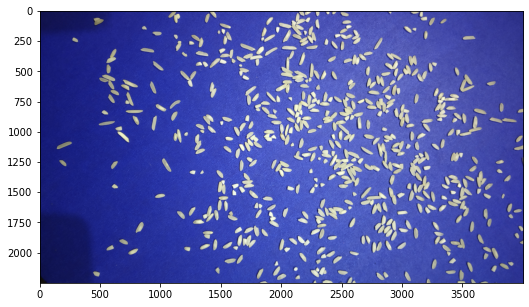

In [ ]:
#Reading Image
img = cv2.imread("/content/image_1.jpg")
show(img,25,5)

Converting Image into Grayscale and then Image Thresholding:

* The first step in Image Pre-processing is to convert the image into grayscale and to apply the threshold function the cv2.threshold()to separate pixels into the foreground, and the background areas.

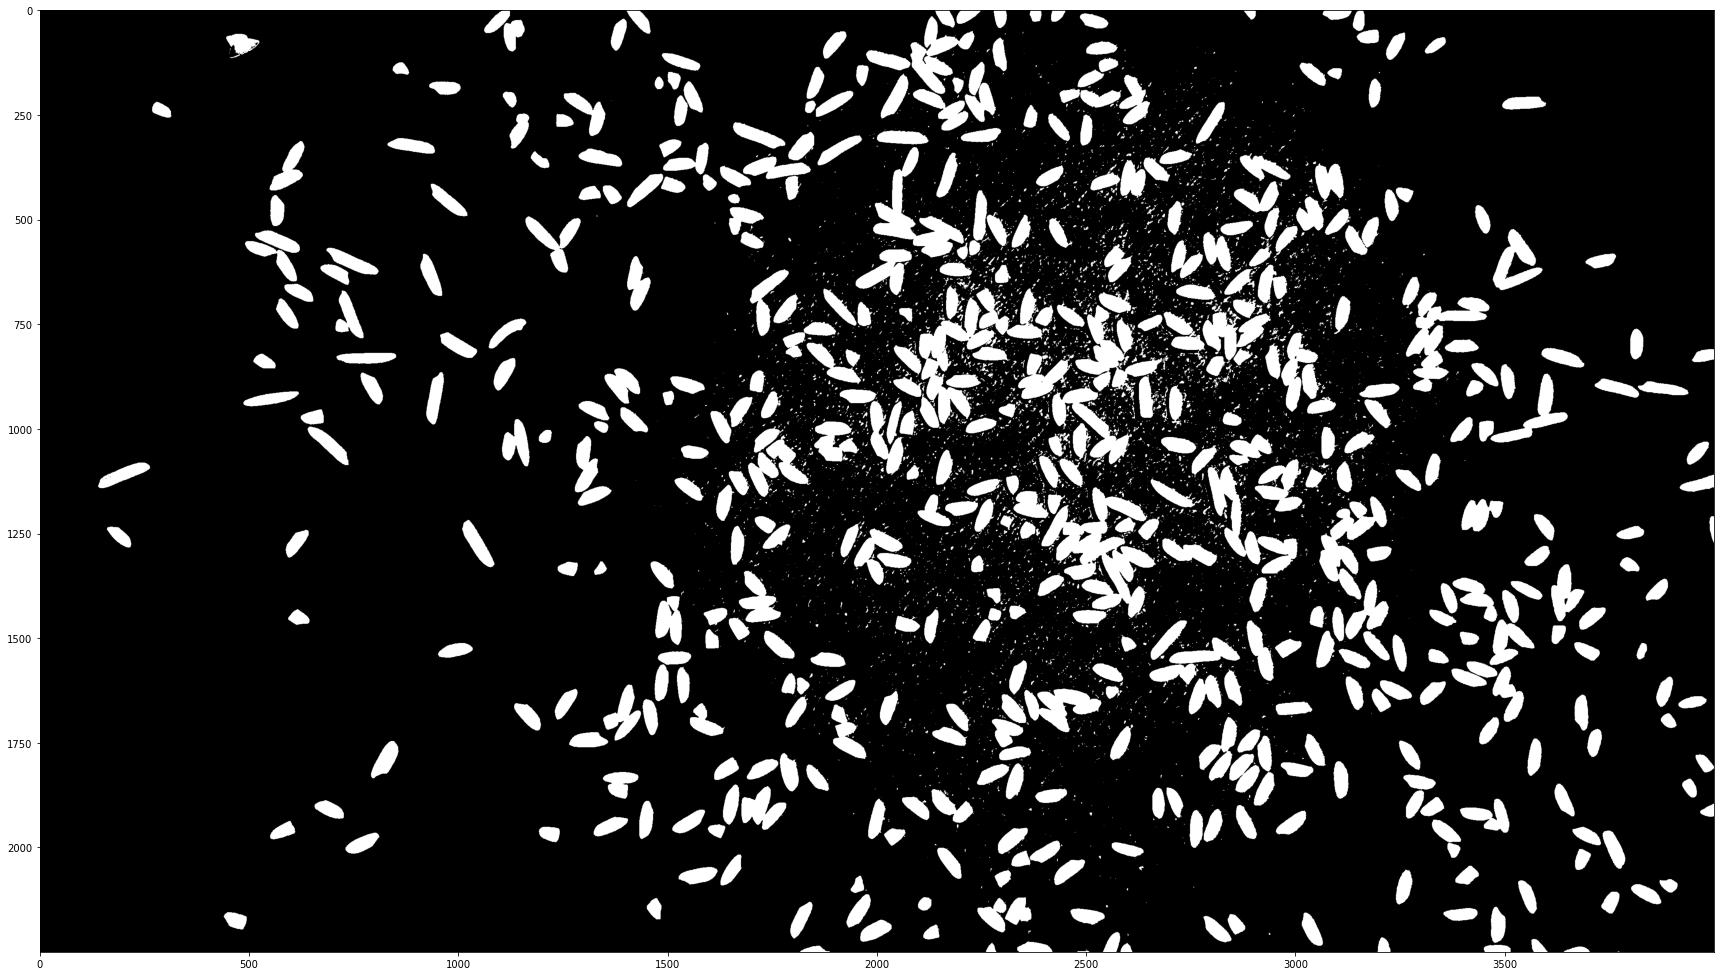

In [ ]:
#Converting Image BGR Image to Gray for Image thresholding and further Image-Preprocessing application
grayscale_Image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh_img = cv2.threshold(grayscale_Image, 120, 255, cv2.THRESH_BINARY)

show(thresh_img)

Noise Removal
* To remove some noise from an image, the morphological function morphologyEx() can be Implemented.

* This function can be used for several morphological operations, so there needed to add a parameter to specify which one can be taken.

* Since the goal here is to remove the white ditorted reason the objectin the image. Here, opening operation (erosion followed by dilation) is going to be in use.

* In this case, we will use four iterations iterations=8 (to suppress larger noise areas we will use more iterations)

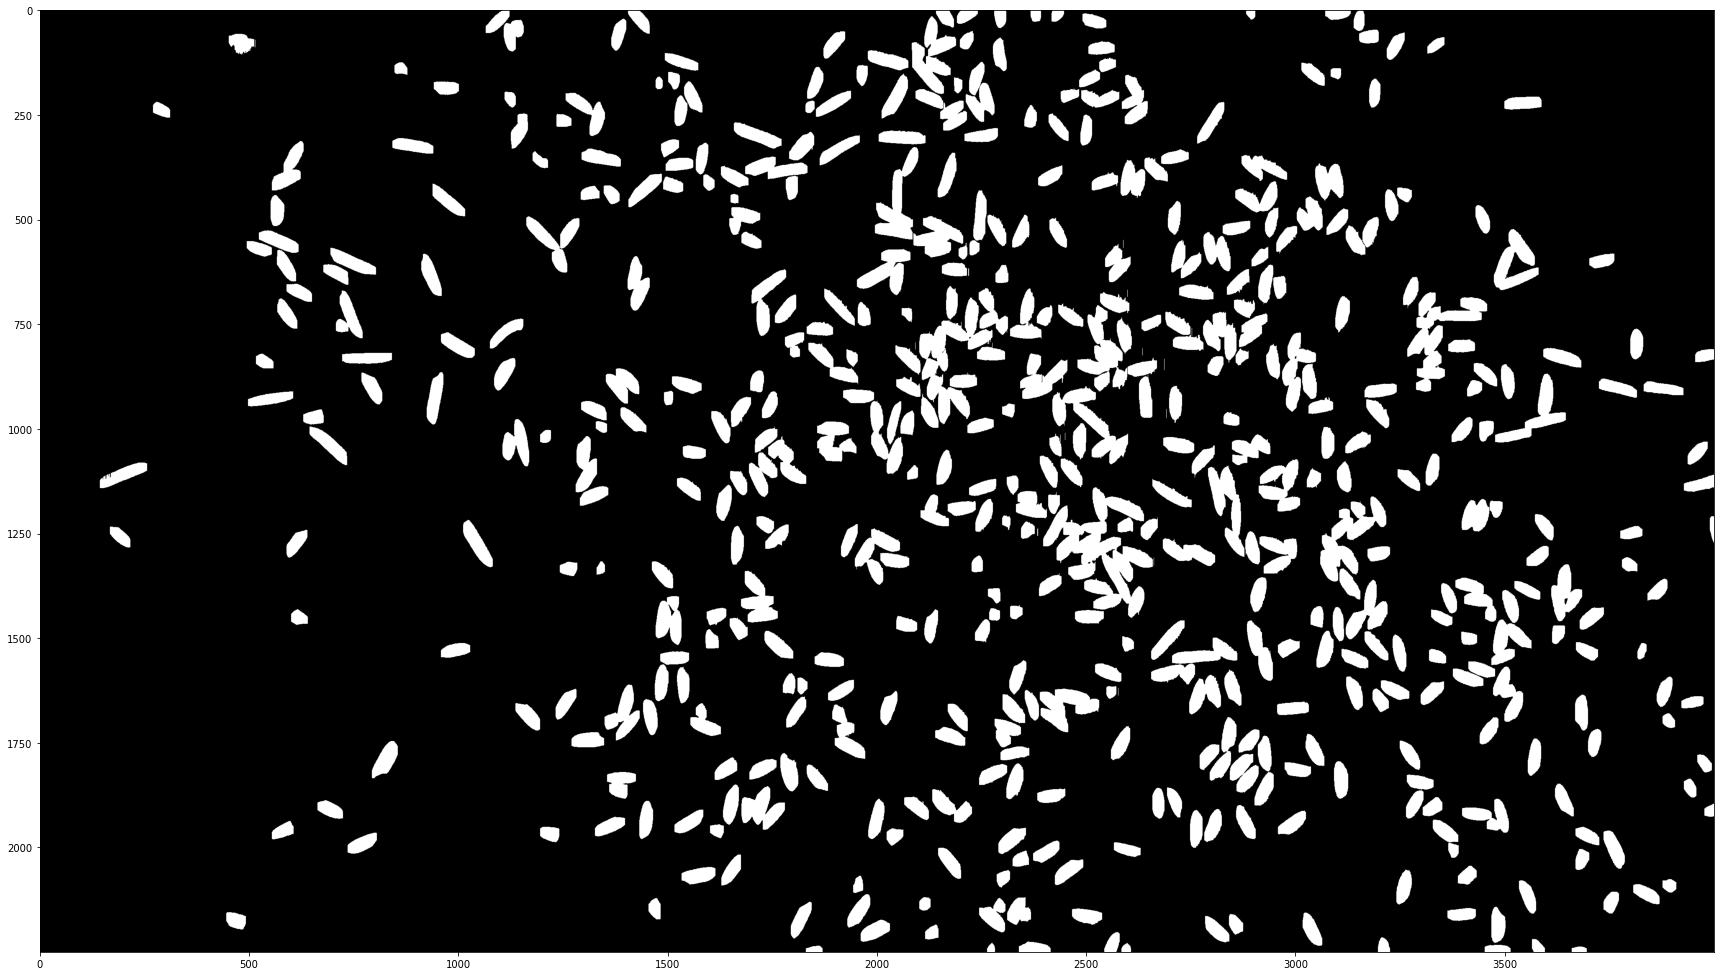

In [ ]:
# Noise removal
kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel, iterations=8)
show(clear_image)

#Counting the labels

In [45]:
#Copying the preprocessed image as label_image
label_image = clear_image.copy()

#Creating a label_count variable to the count the number of grains in the image
label_count = 0

#Shape function for getting height and width
rows, cols = label_image.shape

#Looping through the pixel of image using rows and column of image
for j in range(rows):
    for i in range(cols):
        pixel = label_image[j, i]

        #Here there is single channel with 2 pixel intensities, Either 0 or 255. 0 represent black portion, where 255 represent grains (White).
        #Counting the total number of pixel with intensity 255
        if 255 == pixel:
            label_count += 1

            ##Applying floodFill method of opencv which will help in filling the backgroud that will ultimately helps in couting the contoured grain easily
            cv.floodFill(label_image, None, (i, j), label_count)

Number of forground objects 516472


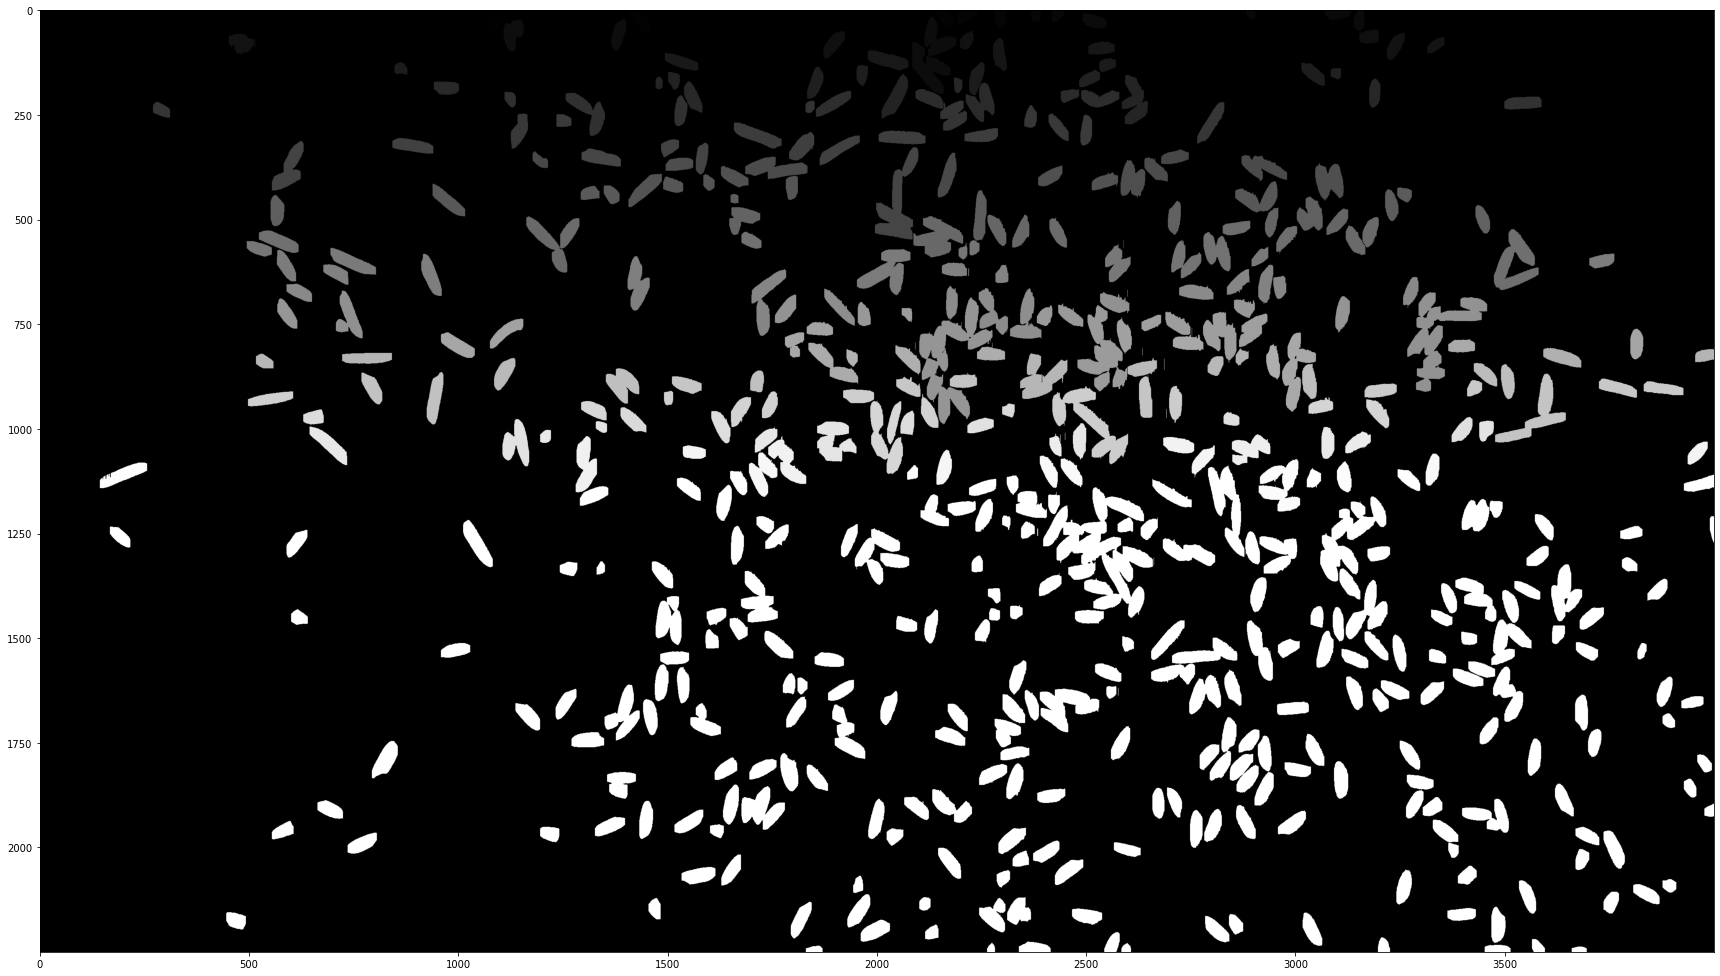

In [ ]:
print("Number of forground objects", label_count)
show(label_image)

#Counting rice grains using Contours method

In [ ]:
#Applying Countours method to get the count of rice grains
contours, hierarchy = cv.findContours(clear_image,
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of Detected Contours", len(contours))

Number of Detected Contours 513


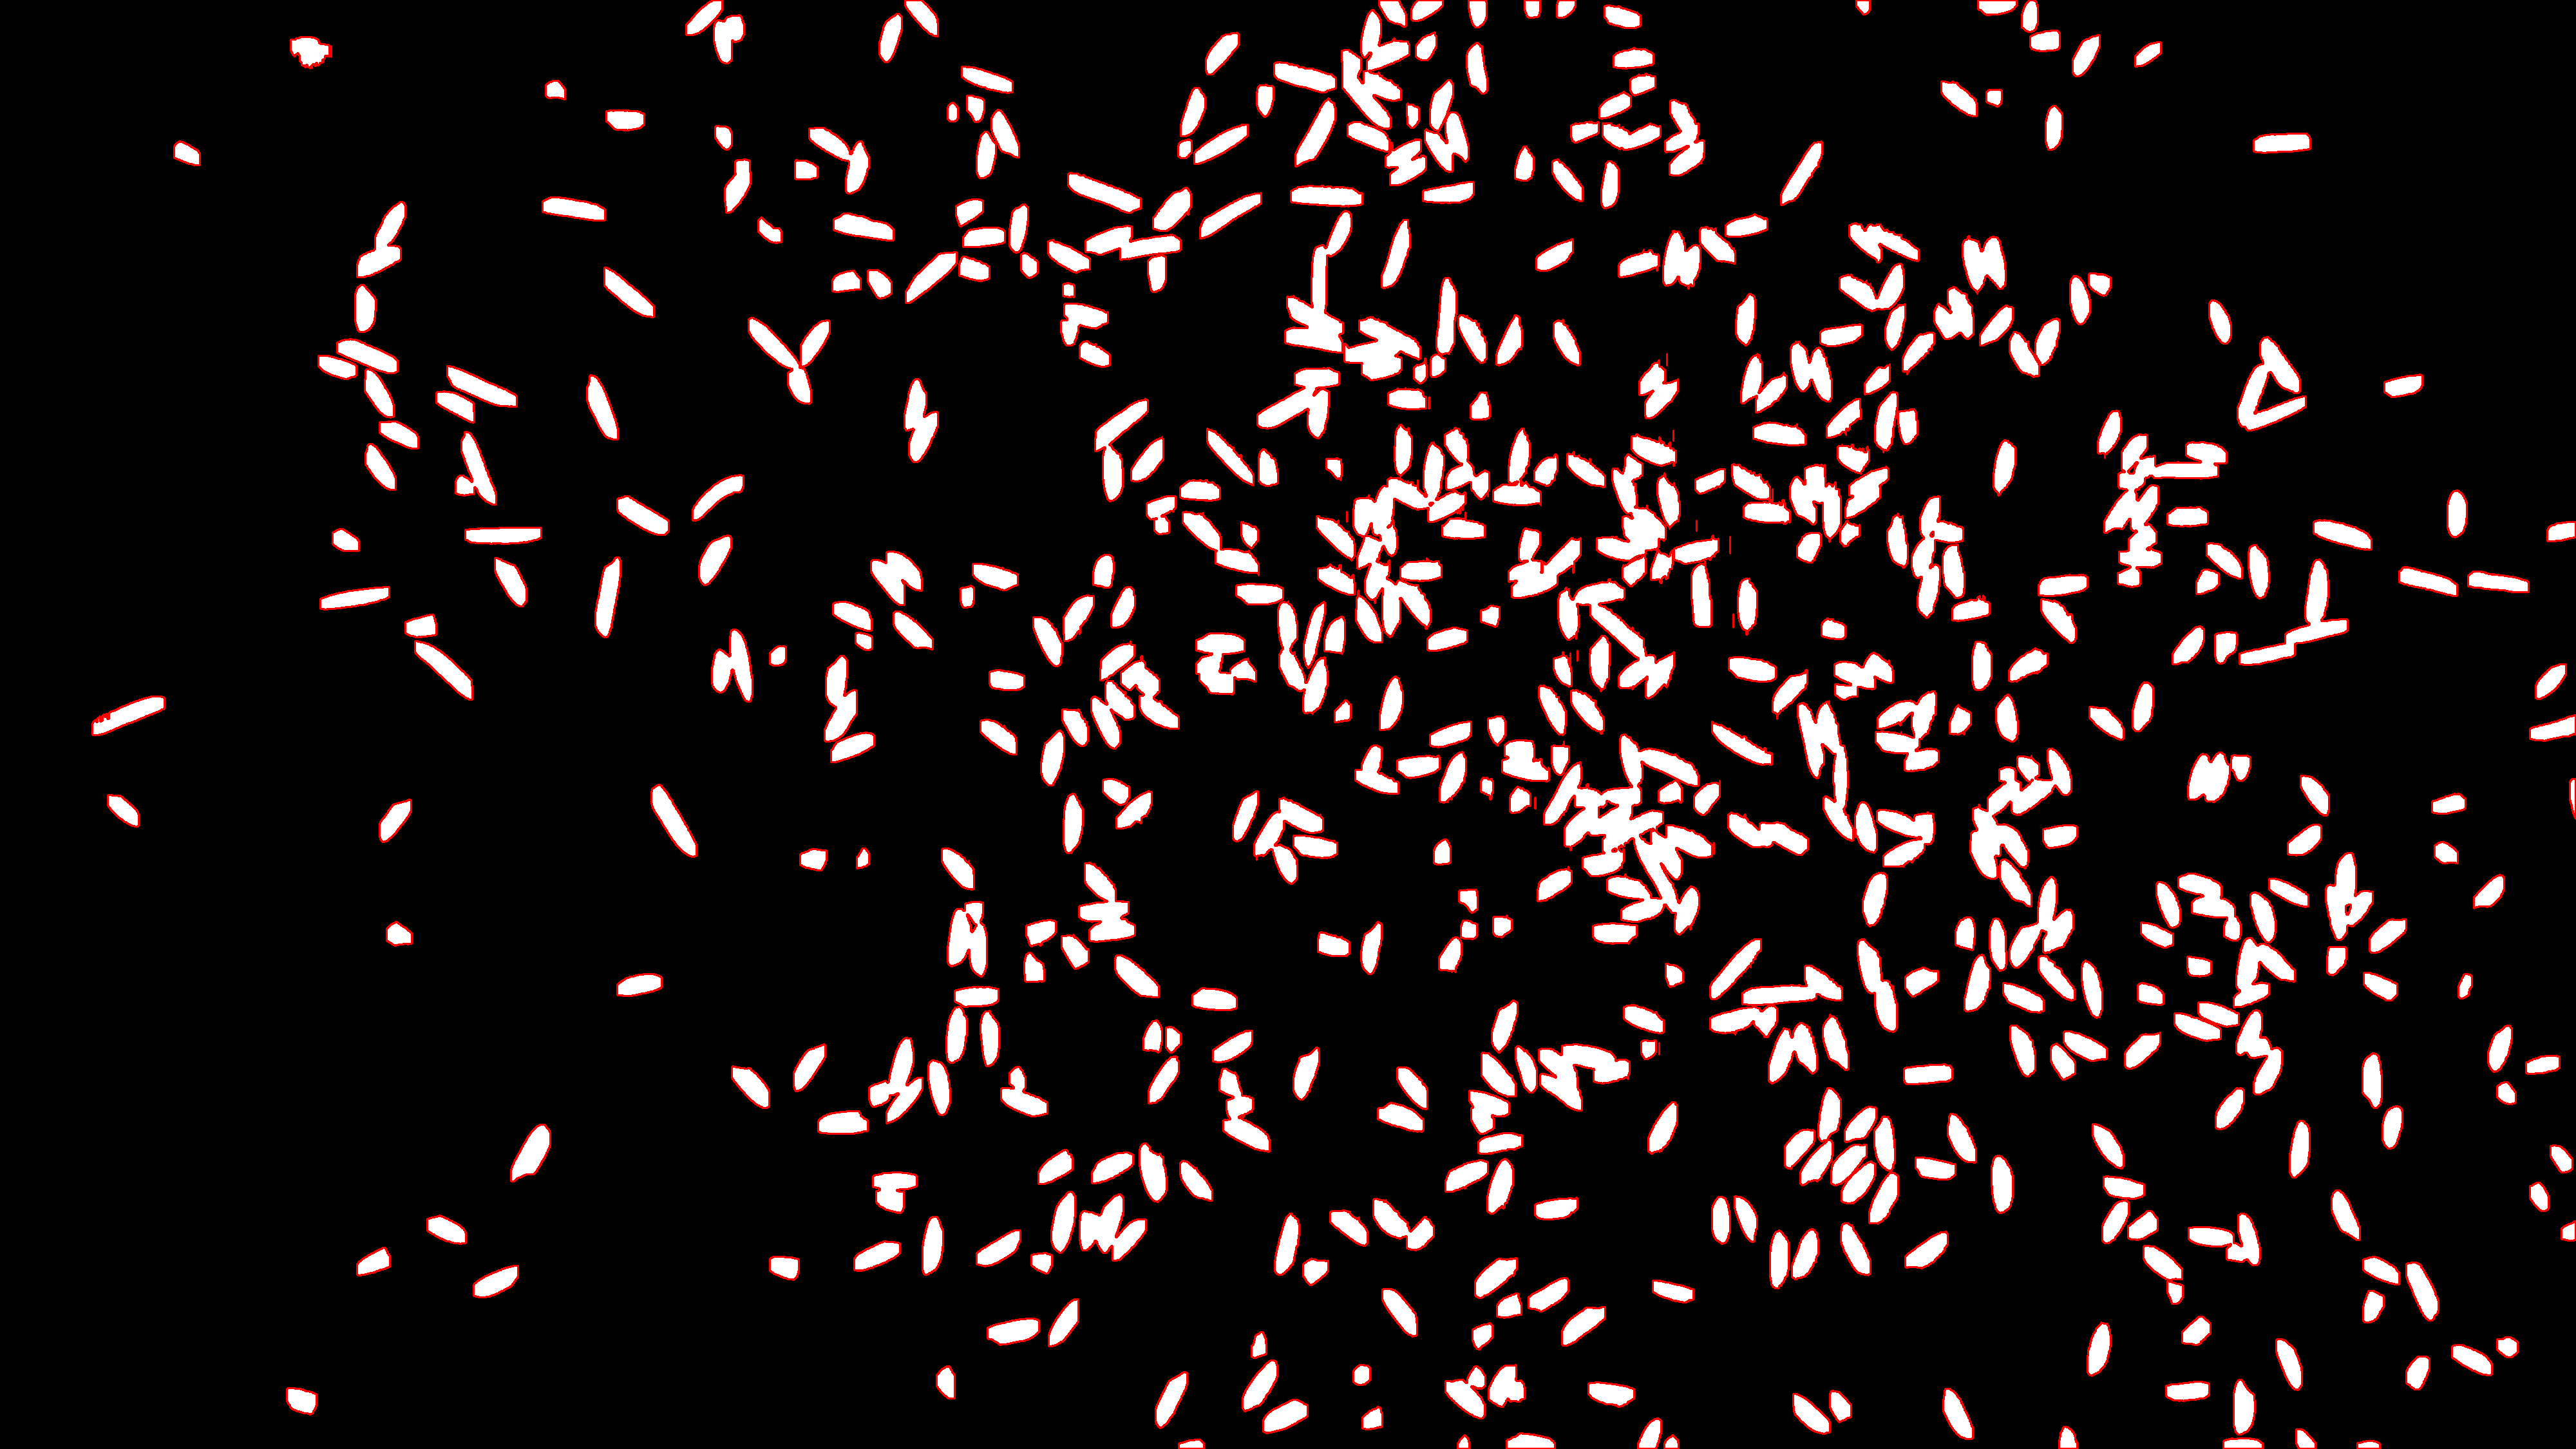


 Number of detected contour 513


In [ ]:
cv2_imshow(output_contour)
print("\n Number of detected contour", len(contours))

Number of detected contours are 513, It denotes, total number of rice grain in the Image.

#Applying Watershed Algorithm

Fixing rice grains Touching problem with "WaterShed Algorithm"
Watershed algorithm is based on extracting sure background and foreground and then using markers will make watershed run and detect the exact boundaries. This algorithm generally helps in detecting touching and overlapping objects in image.

In [ ]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.


#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image) 
# separate merged corns

Counting Total Grains:


Number of rice grains are: 586


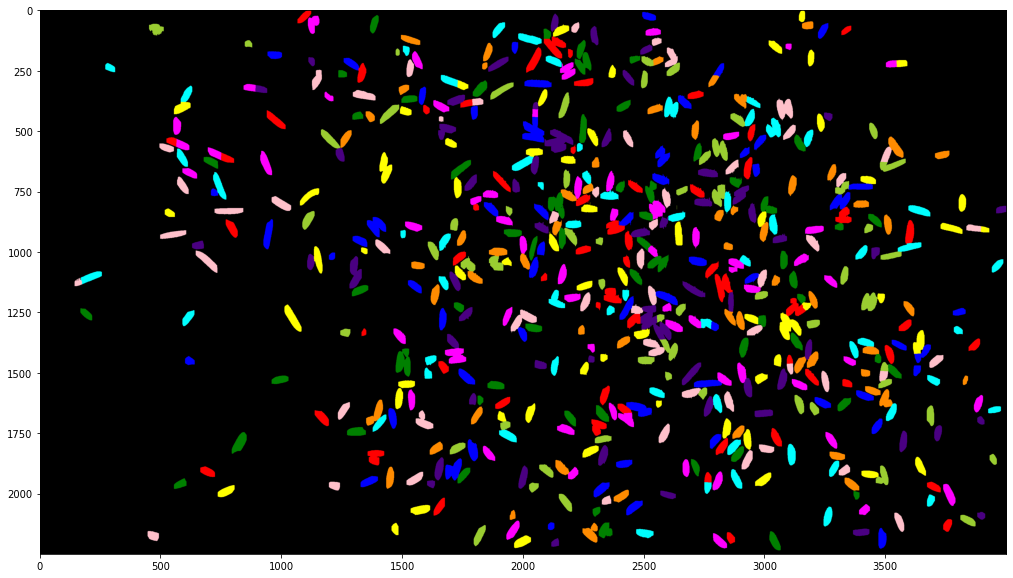

In [ ]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of rice grains are: %d" % labels.max())

Counting Broken Rice:

In [ ]:
# counting Broken rice
def Broken_rice():
  count = []
  for x in contours:
    area = cv.contourArea(x)
    if area<800:
      count.append(x)
  print("Total number of broken rice present in the Image is: ", len(count))

In [ ]:
Broken_rice()

Total number of broken rice present in the Image is:  87
